In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from dateutil.parser import parse

In [36]:
#importa datos del aranet4
aranet = pd.read_csv("../../data/aranet4_20210624.csv",index_col=0,parse_dates=True,
                    names=["aranet","To","HR","P"],skiprows=1)
# del aranet["To"]
# del aranet["HR"]
# del aranet[""]
aranet = aranet.resample("60S").mean()

In [27]:
nocturna = pd.read_csv("../../data/sensores_20210623_20210625.csv",index_col=0,parse_dates=True)
nocturna = nocturna.resample("60S").mean()

In [32]:
nocturna.columns
sensores = ['t3022', 'mh-z14a', 'sen0219']

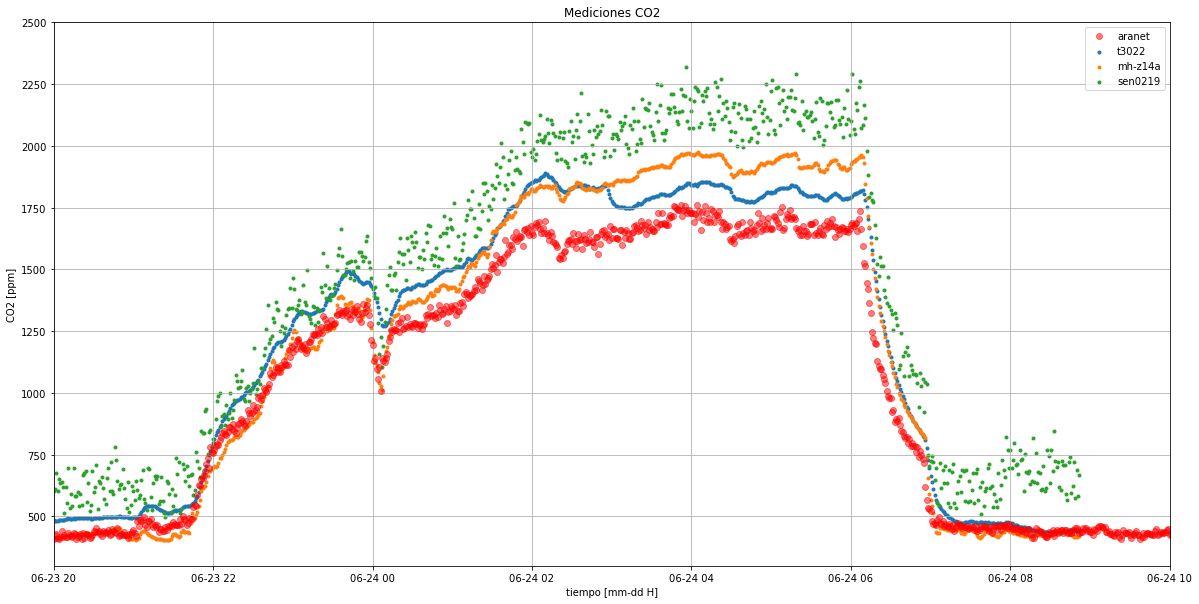

In [34]:
fig, ax = plt.subplots(figsize=(20,10))

fecha1 = parse("2021-06-23 20:00") 
fecha2 = fecha1 + pd.Timedelta("14H")

ax.set_xlim(fecha1,fecha2)
ax.set_ylim(300,2500)
ax.set_ylabel("CO2 [ppm]")
ax.set_xlabel("tiempo [mm-dd H]")
ax.set_title("Mediciones CO2")

ax.plot(aranet.aranet,"ro",label="aranet",alpha=0.5)
for sensor in sensores:
    ax.scatter(nocturna[sensor].index,nocturna[sensor],label=sensor,marker=".")


ax.legend()
ax.grid()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

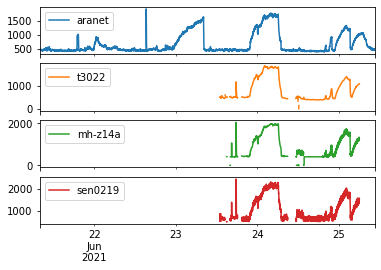

In [38]:
data = pd.concat([aranet["aranet"],nocturna[sensores]],axis=1)
data.plot(subplots=True)

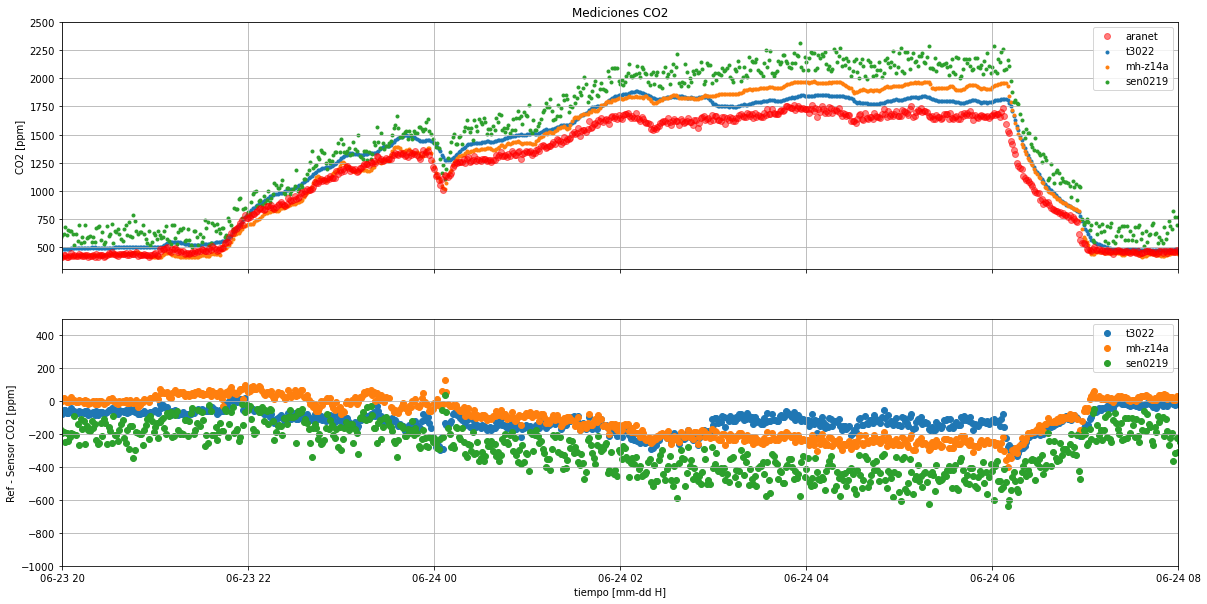

In [96]:
ref = "aranet"
fig, ax = plt.subplots(2,figsize=(20,10),sharex=True)

fecha1 = parse("2021-06-23 20:00") 
fecha2 = fecha1 + pd.Timedelta("12H")


ax[0].set_ylim(300,2500)
ax[0].set_ylabel("CO2 [ppm]")
ax[0].set_title("Mediciones CO2")


ax[0].set_xlim(fecha1,fecha2)
ax[1].set_xlim(fecha1,fecha2)

ax[1].set_ylim(-1000,500)
ax[1].set_ylabel("Ref - Sensor CO2 [ppm]")
ax[1].set_xlabel("tiempo [mm-dd H]")
# ax[1].set_title("Mediciones CO2")

ax[0].plot(aranet.aranet,"ro",label="aranet",alpha=0.5)
for sensor in sensores:
    ax[0].scatter(data[sensor].index,data[sensor],label=sensor,marker=".")


for sensor in sensores:
    ax[1].scatter(data.index,data[ref]-data[sensor],label=sensor)


ax[1].legend()
ax[1].grid()
ax[0].legend()
ax[0].grid()


,t3022,mh-z14a,sen0219
0,-118.582871,-101.50601,-293.327785


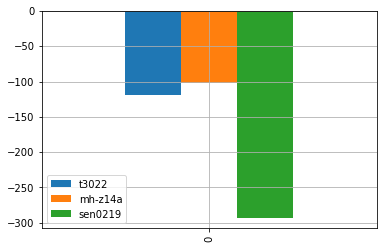

In [98]:
diferencia = {}
for sensor in sensores:
    valor = (data[fecha1:fecha2][ref] - data[fecha1:fecha2][sensor]).mean()
    diferencia.update({sensor:[valor]})

diferencia = pd.DataFrame.from_dict(diferencia)
diferencia.plot(kind="bar")
plt.grid()

diferencia